In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [6]:
# Paths to Train and Test Datasets
train_path = 'Training'
test_path = 'Testing'

In [7]:
# Data Augmentation and Preprocessing
augmentation_gen = ImageDataGenerator(
    rescale=1./255,           
    zoom_range=0.2,          
    horizontal_flip=True      
)


In [8]:
# Load Train Dataset
training_data = augmentation_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),    
    batch_size=64,            
    color_mode="grayscale", 
    class_mode='categorical' 
)

Found 14875 images belonging to 6 classes.


In [9]:
# Load Test Dataset
testing_data = augmentation_gen.flow_from_directory(
    test_path,
    target_size=(48, 48),       
    batch_size=64,           
    color_mode="grayscale",   
    class_mode='categorical', 
    shuffle=False             
)


Found 4031 images belonging to 6 classes.


In [10]:
# Print Class Indices
print("Emotion Labels:", training_data.class_indices)
EMOTIONS = list(training_data.class_indices.keys())

Emotion Labels: {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5}


In [11]:
#CNN Model
emotion_classifier = Sequential()

# Block 1
emotion_classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
emotion_classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
emotion_classifier.add(BatchNormalization())
emotion_classifier.add(MaxPooling2D(pool_size=(2, 2)))
emotion_classifier.add(Dropout(0.25))

# Block 2
emotion_classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_classifier.add(BatchNormalization())
emotion_classifier.add(MaxPooling2D(pool_size=(2, 2)))
emotion_classifier.add(Dropout(0.25))

# Block 3
emotion_classifier.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_classifier.add(BatchNormalization())
emotion_classifier.add(MaxPooling2D(pool_size=(2, 2)))
emotion_classifier.add(Dropout(0.25))

# Fully Connected Layers
emotion_classifier.add(Flatten())
emotion_classifier.add(Dense(128, activation='relu'))
emotion_classifier.add(BatchNormalization())
emotion_classifier.add(Dropout(0.5))
emotion_classifier.add(Dense(len(EMOTIONS), activation='softmax'))

In [12]:
# Model Summary
emotion_classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,570,694 (5.99 MB)

 Trainable params: 1,569,542 (5.99 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [13]:
# Compile the Model
emotion_classifier.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the Model
history_tracker = emotion_classifier.fit(
    training_data,
    steps_per_epoch=training_data.samples // 64,
    epochs=50,
    validation_data=testing_data,
    validation_steps=testing_data.samples // 64
)

Epoch 1/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 210s 900ms/step - accuracy: 0.2050 - loss: 2.5936 - val_accuracy: 0.3480 - val_loss: 3.1444
Epoch 2/50
  1/232 ━━━━━━━━━━━━━━━━━━━━ 3:05 804ms/step - accuracy: 0.2656 - loss: 2.4798

2024-11-22 16:18:15.492248: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2656 - loss: 2.4798 - val_accuracy: 0.0000e+00 - val_loss: 6.3253
Epoch 3/50


2024-11-22 16:18:15.714621: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


232/232 ━━━━━━━━━━━━━━━━━━━━ 181s 779ms/step - accuracy: 0.2578 - loss: 2.1548 - val_accuracy: 0.2598 - val_loss: 5.7678
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.3594 - loss: 1.6889 - val_accuracy: 0.0000e+00 - val_loss: 13.5394
Epoch 5/50


2024-11-22 16:21:17.484799: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


232/232 ━━━━━━━━━━━━━━━━━━━━ 161s 693ms/step - accuracy: 0.2828 - loss: 2.0290 - val_accuracy: 0.3203 - val_loss: 2.2480
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.3906 - loss: 1.7891 - val_accuracy: 0.0317 - val_loss: 3.3080
Epoch 7/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.3193 - loss: 1.9015 - val_accuracy: 0.3921 - val_loss: 1.6636
Epoch 8/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1875 - loss: 2.1062 - val_accuracy: 0.3492 - val_loss: 2.0817
Epoch 9/50


2024-11-22 16:28:59.281226: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


232/232 ━━━━━━━━━━━━━━━━━━━━ 187s 805ms/step - accuracy: 0.3359 - loss: 1.8260 - val_accuracy: 0.3964 - val_loss: 1.5998
Epoch 10/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.2593 - loss: 1.7965 - val_accuracy: 0.3333 - val_loss: 1.7559
Epoch 11/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 184s 792ms/step - accuracy: 0.3601 - loss: 1.7752 - val_accuracy: 0.3823 - val_loss: 1.6171
Epoch 12/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.3438 - loss: 1.8457 - val_accuracy: 0.2540 - val_loss: 1.9897
Epoch 13/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 165s 709ms/step - accuracy: 0.3645 - loss: 1.7160 - val_accuracy: 0.4307 - val_loss: 1.4981
Epoch 14/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.4375 - loss: 1.5484 - val_accuracy: 0.4444 - val_loss: 1.4256
Epoch 15/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 162s 697ms/step - accuracy: 0.4014 - loss: 1.6304 - val_accuracy: 0.4413 - val_loss: 1.4626
Epoch 16/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.4375 - loss: 1.565

2024-11-22 16:40:38.898837: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


232/232 ━━━━━━━━━━━━━━━━━━━━ 163s 702ms/step - accuracy: 0.4030 - loss: 1.6104 - val_accuracy: 0.4446 - val_loss: 1.5267
Epoch 18/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.4531 - loss: 1.3057 - val_accuracy: 0.4762 - val_loss: 1.3829
Epoch 19/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 160s 691ms/step - accuracy: 0.4223 - loss: 1.5639 - val_accuracy: 0.3954 - val_loss: 1.6199
Epoch 20/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.4219 - loss: 1.4693 - val_accuracy: 0.1429 - val_loss: 2.2389
Epoch 21/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 183s 787ms/step - accuracy: 0.4422 - loss: 1.5082 - val_accuracy: 0.4655 - val_loss: 1.4108
Epoch 22/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.4531 - loss: 1.5483 - val_accuracy: 0.7302 - val_loss: 0.9220
Epoch 23/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 177s 764ms/step - accuracy: 0.4532 - loss: 1.4716 - val_accuracy: 0.4526 - val_loss: 1.4066
Epoch 24/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.3906 - loss: 1.357

2024-11-22 17:04:48.856276: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


232/232 ━━━━━━━━━━━━━━━━━━━━ 202s 788ms/step - accuracy: 0.4969 - loss: 1.3469 - val_accuracy: 0.4592 - val_loss: 1.4243
Epoch 34/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.5000 - loss: 1.2346 - val_accuracy: 0.5079 - val_loss: 1.3152
Epoch 35/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 186s 800ms/step - accuracy: 0.4960 - loss: 1.3400 - val_accuracy: 0.4609 - val_loss: 1.3905
Epoch 36/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4531 - loss: 1.4018 - val_accuracy: 0.5397 - val_loss: 1.2334
Epoch 37/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 190s 819ms/step - accuracy: 0.5001 - loss: 1.3358 - val_accuracy: 0.4463 - val_loss: 1.4048
Epoch 38/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4531 - loss: 1.3666 - val_accuracy: 0.6508 - val_loss: 1.1230
Epoch 39/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 190s 816ms/step - accuracy: 0.5144 - loss: 1.2959 - val_accuracy: 0.4851 - val_loss: 1.3600
Epoch 40/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.5312 - loss: 1.3609 - 

In [15]:
# Evaluating
final_loss, final_accuracy = emotion_classifier.evaluate(testing_data)
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")
print(f"Final Test Loss: {final_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.4451 - loss: 1.4266
Final Test Accuracy: 51.18%
Final Test Loss: 1.2968


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step


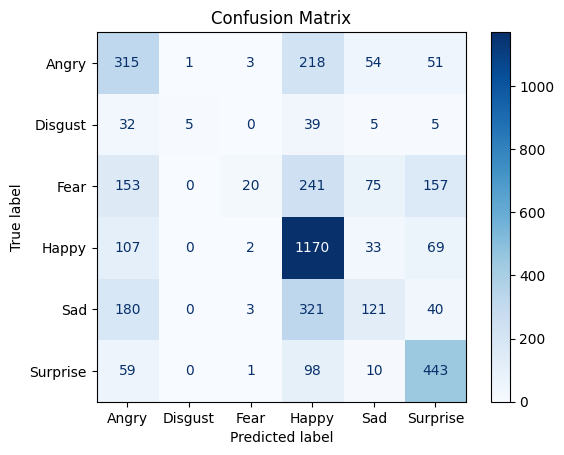


Classification Report:
              precision    recall  f1-score   support

       Angry       0.37      0.49      0.42       642
     Disgust       0.83      0.06      0.11        86
        Fear       0.69      0.03      0.06       646
       Happy       0.56      0.85      0.67      1381
         Sad       0.41      0.18      0.25       665
    Surprise       0.58      0.73      0.64       611

    accuracy                           0.51      4031
   macro avg       0.57      0.39      0.36      4031
weighted avg       0.53      0.51      0.45      4031



In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix and Classification Report
predicted_emotions = emotion_classifier.predict(testing_data)
predicted_labels = np.argmax(predicted_emotions, axis=1)
true_labels = testing_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=EMOTIONS)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=EMOTIONS))


In [16]:
# Model saving
emotion_classifier.save('emotion_recognition_model.keras')
print("Model saved successfully.")

Model saved successfully.


In [18]:
def plot_emotion_distribution(predictions, emotions):
    plt.bar(emotions, predictions)
    plt.xlabel('Emotions')
    plt.ylabel('Probability')
    plt.title('Emotion Distribution')
    plt.show()

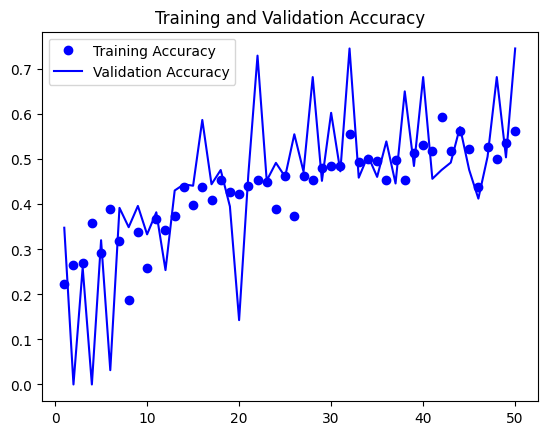

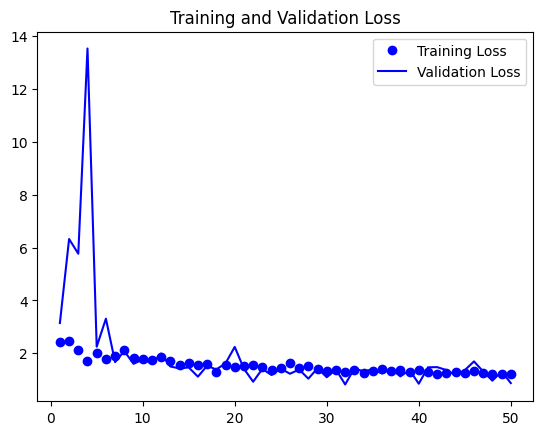

In [17]:
 # Plot
def plot_training_history(history):
    train_accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(train_accuracy) + 1)

    # Accuracy Plot
    plt.figure()
    plt.plot(epochs, train_accuracy, "bo", label="Training Accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

    # Loss Plot
    plt.figure()
    plt.plot(epochs, train_loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

plot_training_history(history_tracker)